## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

After having gathered, assessed and cleaned WeRateDogs twitter data I conducted some analysis on the dataset to establish some insights.

Out of all the features in the dataset the features of interest to me were retweet count, favourite count and dog type. Which led to the following Insights and Visualizations:

1.  The most popular dog type:

  -   By rating ratio
  -   By favorite count
  -   By retweet count


2.  The most popular dog breed:

  -   By rating ratio
  -   By favorite count
  -   By retweet count


3.  The relationship between retweets and favorites


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
from IPython.display import Image
import os
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
df = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')

## The most popular dog type

We returned a Series containing counts of unique values, generated a descriptive statistics and then plotted a box plot to show distributions with respect to categories. Thereafter, the most popular dog is Pupper.


In [2]:
df['rating_ratio'] = df['rating_numerator'] / df['rating_denominator']

In [3]:
df['dog_type'].value_counts()

pupper            191
doggo              63
puppo              20
floofer             9
doggo, pupper       8
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

In [4]:
# Remove missing stages, the stages that only have one sample size, and outliers
stage = df.query('dog_type !="" & dog_type != "doggo, puppo" & dog_type != "doggo, floofer"')
stage['dog_type'].value_counts()

pupper           191
doggo             63
puppo             20
floofer            9
doggo, pupper      8
Name: dog_type, dtype: int64

### By Rating Ratio

In [5]:
stage.groupby('dog_type')['rating_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,1.182540,0.137418,0.8,1.100,1.2,1.3,1.4
"doggo, pupper",8.0,1.087500,0.253194,0.5,1.075,1.2,1.2,1.3
floofer,9.0,1.188889,0.105409,1.0,1.100,1.2,1.3,1.3
pupper,191.0,1.067016,0.171713,0.3,1.000,1.1,1.2,1.4
puppo,20.0,1.185000,0.130888,0.9,1.100,1.2,1.3,1.4


### By Favorite Count

In [6]:
stage.groupby('dog_type')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,12175.317460,11419.241075,0.0,4037.5,8157.0,20181.00,43694.0
"doggo, pupper",8.0,6148.500000,5492.964097,0.0,2831.5,3795.5,10913.50,14015.0
floofer,9.0,9425.333333,11714.938796,0.0,2651.0,5094.0,10681.00,37914.0
pupper,191.0,6038.198953,8846.010750,0.0,1932.5,2890.0,6429.50,67100.0
puppo,20.0,11773.000000,11930.784180,0.0,0.0,9930.0,16072.25,38818.0


Text(0.5,1,'Dog Type by Favorite Count')

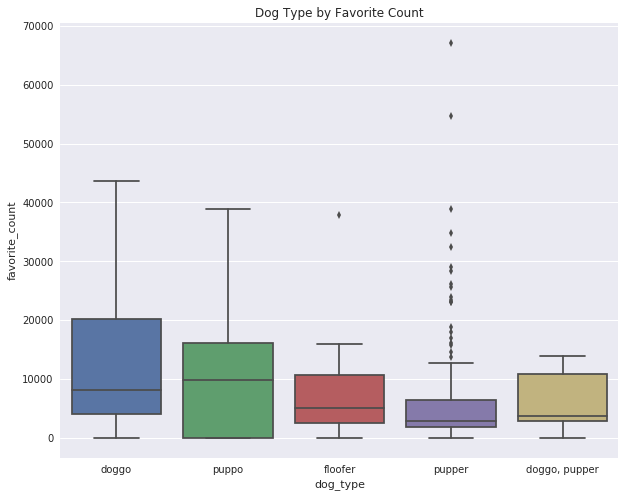

In [7]:
#Now, let's plot a boxplot
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x='dog_type', y="favorite_count", data=stage).set_title('Dog Type by Favorite Count')

### By Retweet Counts

In [8]:
stage.groupby('dog_type')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,4956.000000,4853.681343,10.0,1899.00,3884.0,6229.50,24319.0
"doggo, pupper",8.0,2311.125000,1802.520254,113.0,1047.25,1730.5,3653.25,5247.0
floofer,9.0,3191.111111,2812.196448,764.0,1226.00,1714.0,4581.00,8329.0
pupper,191.0,2413.895288,3953.312856,97.0,640.50,1045.0,2241.00,31989.0
puppo,20.0,5207.800000,4608.195190,135.0,2175.25,4272.0,6611.50,18963.0


Text(0.5,1,'Dog Type by Retweet Count')

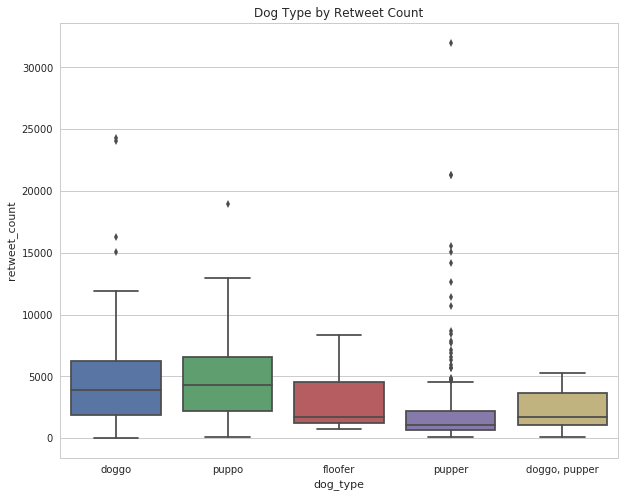

In [9]:
#Now, let's plot a boxplot
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.boxplot(x='dog_type', y="retweet_count", data=stage).set_title('Dog Type by Retweet Count')

## The most popular dog breed

We returned a Series containing counts of unique values, accessed a group of rows and columns by a boolean array, generated a descriptive statistics and then plotted a box plot to show distributions with respect to categories. And then, we saw that the most popular dog breed is Chihuahua.

In [10]:
df.dog_breed_prediction.value_counts().head(5)

Golden Retriever      165
Labrador Retriever    102
Chihuahua              88
Pembroke               85
Pug                    63
Name: dog_breed_prediction, dtype: int64

In [11]:
# Find out the top 5 breed that has the most images
array = ['Golden_Retriever','Labrador_Retriever','Chihuahua','Pembroke','Pug']
new_df = df.loc[df['dog_breed_prediction'].isin(array)]

### By Rating Ratio

In [12]:
new_df.groupby('dog_breed_prediction').rating_ratio.describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,1.170455,0.467854,0.2,1.1,1.2,1.3,5.0
Pembroke,85.0,1.052941,0.215798,0.3,1.0,1.1,1.2,1.4
Pug,63.0,1.096825,0.194246,0.3,1.0,1.1,1.2,1.4


In [13]:
new_df.groupby('dog_breed_prediction')['dog_type'].value_counts()

dog_breed_prediction  dog_type     
Chihuahua             pupper           7
                      doggo            3
                      puppo            2
                      doggo, pupper    1
Pembroke              pupper           6
                      doggo            5
Pug                   doggo            3
                      pupper           3
                      puppo            2
                      floofer          1
Name: dog_type, dtype: int64

### By Favorite Count

In [14]:
new_df.groupby('dog_breed_prediction')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,9646.522727,10126.887452,0.0,2742.25,5665.5,13032.0,40325.0
Pembroke,85.0,7362.988235,9112.917834,0.0,2056.00,4249.0,7620.0,38074.0
Pug,63.0,7529.539683,7676.342547,0.0,1580.00,5565.0,12065.5,35553.0


Text(0.5,1,'Dog Breed by Favorite Count')

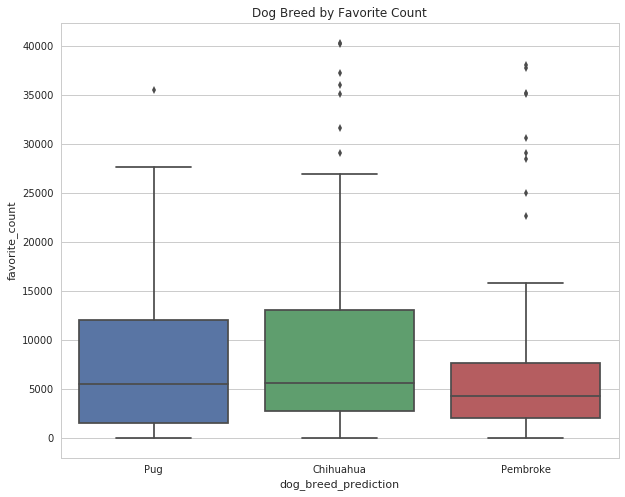

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dog_breed_prediction', y="favorite_count", data=new_df).set_title('Dog Breed by Favorite Count')

### By Retweet Counts

In [16]:
new_df.groupby('dog_breed_prediction')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,4019.977273,6750.211106,213.0,1158.5,2252.5,4294.0,56625.0
Pembroke,85.0,2661.929412,3061.029751,119.0,786.0,1561.0,3282.0,17465.0
Pug,63.0,2960.174603,2923.306290,39.0,991.0,2013.0,3806.5,14740.0


Text(0.5,1,'Dog Breed by Retweet Count')

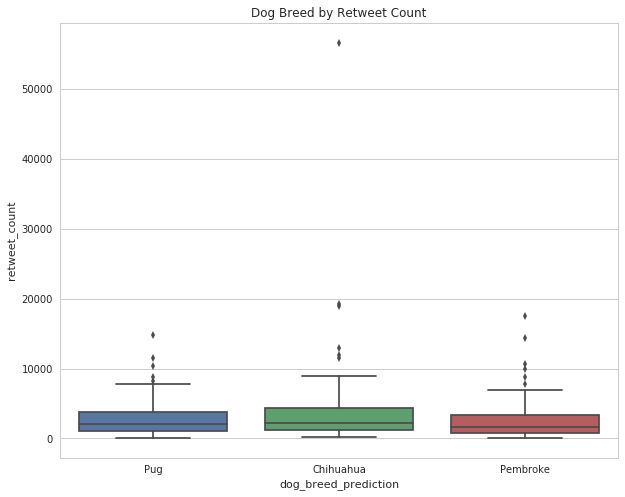

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dog_breed_prediction', y="retweet_count", data=new_df).set_title('Dog Breed by Retweet Count')

## The relationship between retweets and favorites:

We made plots of Series or DataFrame.  The scatter plot showed that there is a strong relation between retweets and favorites. The relation called Positive Correlation. So, the increase in retweets leads to an increase in favorites.

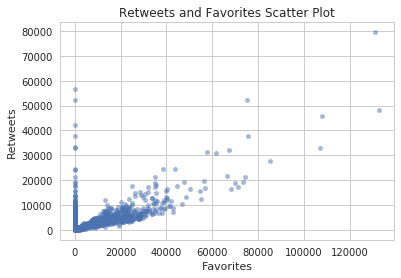

In [18]:
#Retweets vs. Favorites

df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Scatter Plot')

plt.savefig('Retweets_vs_Favorites.png', bbox_inches='tight')

## Conclusion:

The accuracy of such analysis cannot be relied upon unless the dataset is gathered properly and is free of quality as well as tidiness issues. But since my analysis was conducted on a clean dataset, I can say that these numbers as well as the visualizations are pretty accurate. The write up offers a straight look at the data wrangling process. There is so much
more that can be done with this data set.